In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.linear_model import Perceptron
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  StandardScaler
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [109]:
df = pd.read_csv('placement.csv')

In [110]:
df.head()

,cgpa,resume_score,placed
0,8.14,6.52,1
1,6.17,5.17,0
2,8.27,8.86,1
3,6.88,7.27,1
4,7.52,7.30,1


In [111]:

X = df.iloc[:,0:2]
y = df.iloc[:,-1]

### Perceptron

Perceptron is an algorithm used in supervised machine learning 
Perceptron is a binary classifier
Perceptron is a line in 2D which creates teo resign classigy

# Structure of a Perceptron

A perceptron models a single neuron in the human brain and consists of the following components:

1. **Inputs (\(x_1, x_2, ..., x_n\))**:  
   These are the features or values fed into the perceptron.

2. **Weights (\(w_1, w_2, ..., w_n\))**:  
   Each input is assigned a weight that signifies its importance or contribution to the output.

3. **Bias (\(b\))**:  
   The bias allows the perceptron to shift the activation function, enabling it to model more complex decision boundaries.

4. **Weighted Sum**:  
   The perceptron calculates the weighted sum of the inputs and bias:
   \[
   z = \sum_{i=1}^n w_i x_i + b
   \]

5. **Activation Function**:  
   The perceptron applies an activation function to determine the final output. The original perceptron used a **step function**, where:
   \[
   \text{output} =
   \begin{cases} 
   1 & \text{if } z \geq 0 \\
   0 & \text{if } z < 0
   \end{cases}
   \]


In [112]:
p = Perceptron()

In [113]:
p.fit(X,y)

Perceptron()

In [114]:
p.coef_

array([[ 40.26, -36.  ]])

In [115]:
p.intercept_

array([-25.])

/home/mobcoder/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


<Axes: >

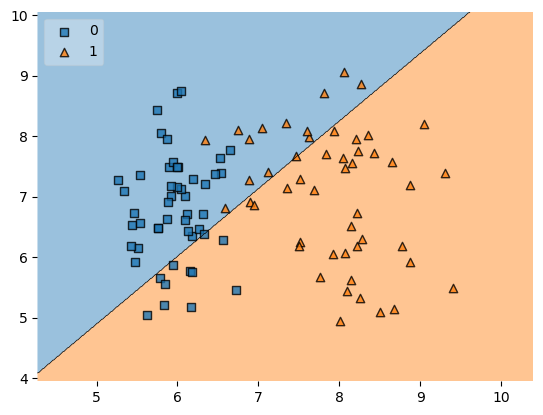

In [116]:
plot_decision_regions(X.values, y.values, clf=p, legend=2)

In [117]:
X, y = make_classification(n_samples =100, n_features  =2, n_informative=1, n_redundant =0,
n_classes =2 , n_clusters_per_class =1, random_state =41, hypercube = False, class_sep =10)

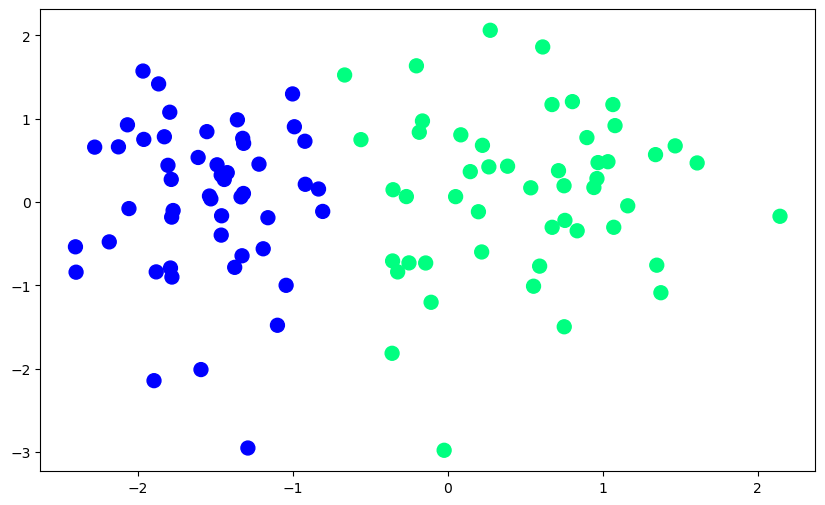

In [118]:
plt.figure(figsize =(10,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap ='winter', s= 100)

In [119]:
def step (z):
    return  1 if z>0 else 0

In [120]:
def perceptron(X,y):
    X = np.insert(X,0,1,axis =1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j], weights))
        weights = weights +lr*(y[j]-y_hat) *X[j]
        return weights[0], weights[1:]

In [121]:
intecept_,coef_ =perceptron(X,y)

In [122]:
print(coef_)
print(intecept_)

[1.08324112 0.98440096]
0.9


In [123]:
m = -(coef_[0]/coef_[1])
b = -(intecept_/coef_[1])

In [124]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input +b

(-3.0, 2.0)

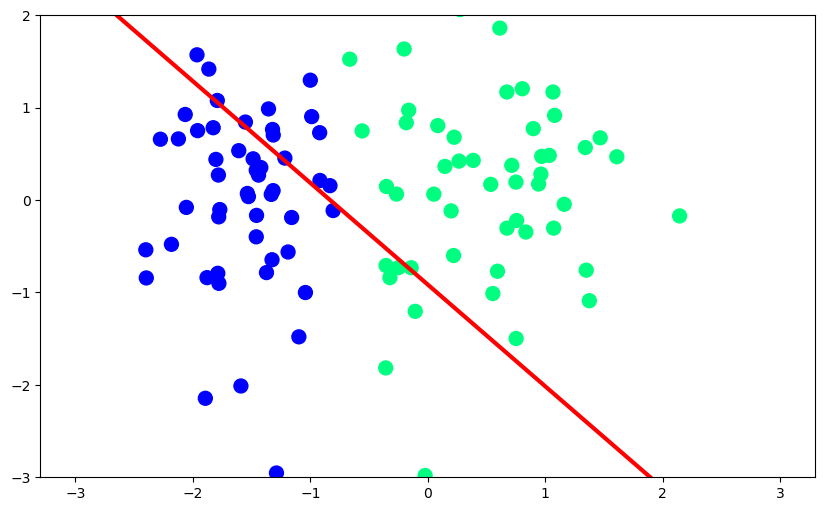

In [125]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

### Loss Function in Deep Learning

A **loss function** is a key concept in deep learning that measures how well a model's predictions match the true labels. It helps the model learn by giving it feedback on its performance.

#### Types of Loss Functions

##### 1. **Regression Loss Functions** (for predicting numbers)
   - Mean Squared Error (MSE)
   - Mean Absolute Error (MAE)
#### 2. **Classification Loss Functions** (for predicting categories)
   - Cross-Entropy Loss
   - Hinge Loss

In [126]:
## Loss Function
def perseptron2(X,y):
    w1 = w2 =b=1
    lr = 0.1
    for j in  range(1000):
        for i in range(X.shape[0]):
          z= w1*X[i][0] + w2*X[i][1] + b
          if z*y[i]< 0:
              w1 =w1 +lr*y[i]*X[i][0]
              w2 = w2 + lr*y[i]*X[i][1]
              b =b +lr*y[i]
    return w1 , w2 ,b

In [127]:
w1, w2, b  = perseptron2(X,y)

In [128]:
w1

0.9243919310080415

In [129]:
w2

0.15134060762638524

In [130]:
b

1.4000000000000004

In [131]:
m= -(w1/w2)
c= -(b/w2)

(-3.0, 2.0)

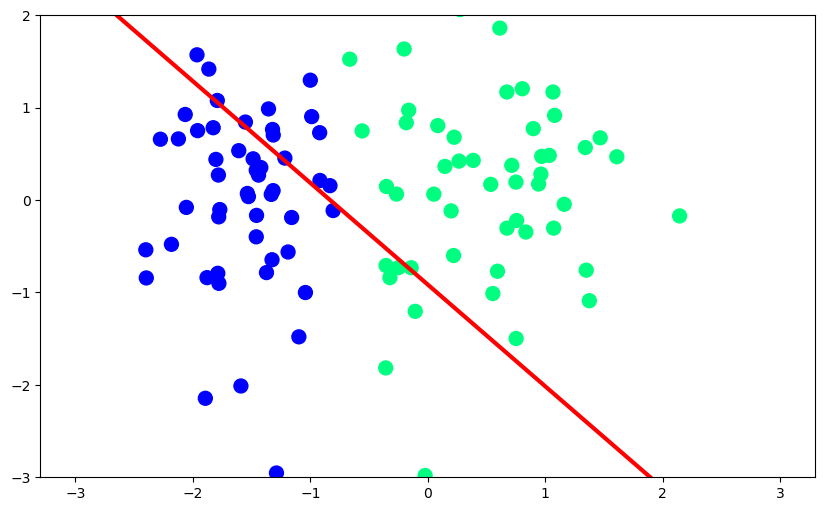

In [132]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

### MLP Multi Layer Perceptron
A **Multilayer Perceptron (MLP)** is a type of artificial neural network that takes input, processes it through one or more hidden layers, and produces an output. Each layer is made of small units called neurons, which work together to learn patterns in data. It uses math (like adding weights and applying functions) to make predictions and improves by adjusting itself during training.

In [133]:
import numpy as np
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [0], [0], [1]])

In [134]:
df = pd.read_csv('Churn_Modelling.csv')

In [135]:
df.head()
# df.info()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [136]:
df.duplicated().sum()

0

In [137]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [138]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [139]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [140]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

In [141]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [142]:
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first= True)

In [143]:
X = df.drop(columns=['Exited'])
y = df['Exited']

In [144]:
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size= 0.2 , random_state= 42)

In [145]:
s = StandardScaler()
X_train_scalled = s.fit_transform(X_train)
X_test_scalled = s.fit_transform(X_test)

In [146]:
model = Sequential()
model.add(Dense(3, activation = 'sigmoid', input_dim =11))
model.add(Dense(1,activation = 'sigmoid'))

In [147]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 3)                 36        
                                                                 
 dense_7 (Dense)             (None, 1)                 4         
                                                                 
Total params: 40
Trainable params: 40
Non-trainable params: 0
_________________________________________________________________


In [148]:
model.compile(loss= 'binary_crossentropy', optimizer= 'Adam')

In [149]:
model.fit(X_train_scalled, y_train, epochs=10)

Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.5240
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4736
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4572
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4492
Epoch 5/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4439
Epoch 6/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4399
Epoch 7/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4368
Epoch 8/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4344
Epoch 9/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4325
Epoch 10/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4311


In [150]:
model.layers[0].get_weights()

[array([[-2.1511868e-02,  9.7543709e-02,  2.1137296e-01],
        [-1.5084460e+00, -2.1551111e+00, -1.3244039e+00],
        [-9.8981328e-02,  1.3914788e-01,  4.3605246e-02],
        [-5.9627328e-02,  8.9828946e-02, -4.8590618e-01],
        [-1.2299259e-03,  1.9934519e-01,  1.9613379e-01],
        [ 1.8252291e-02,  9.3245789e-02, -4.8851945e-02],
        [ 8.2542849e-01,  2.3760355e-01,  9.9361682e-01],
        [ 4.4771127e-02,  4.2638969e-02, -1.0472466e-01],
        [-3.9931858e-01, -6.1792850e-01, -7.5002331e-01],
        [ 4.2309630e-01,  1.2504271e-01, -3.0599666e-01],
        [ 1.5107128e-01,  2.4238130e-01,  7.3562336e-01]], dtype=float32),
 array([-0.07924741,  0.2535847 ,  0.3178303 ], dtype=float32)]

In [151]:
model.layers[1].get_weights()

[array([[-0.3529149],
        [-1.1272289],
        [-1.3700622]], dtype=float32),
 array([-0.04819772], dtype=float32)]

In [152]:
y_log =model.predict(X_test_scalled)

63/63 [==============================] - 0s 2ms/step


In [153]:
y_pred = np.where (y_log > 0.5, 1,0)

In [154]:
from sklearn.metrics import accuracy_score

In [155]:
accuracy_score(y_test, y_pred)

0.8035